In [70]:
import pandas as pd

In [71]:
import numpy as np

In [72]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt

In [74]:
import warnings

In [75]:
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv('titanic_train.csv')

In [77]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.shape

(891, 12)

There are 891 rows and 12 columns in dataset. The Survived column is out target attribute.The target class is having categorical variables. Thus it is a classification problem.

In [79]:
df['Survived'].unique()

array([0, 1], dtype=int64)

The target variable has two unique values as 0 and 1

In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the counts, we can see that age has missing data. Also Plcass,has same 50 75 and max .

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in age, 687 in cabin and 2 in embarked

In [82]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [83]:
#age has float data type. Missing values can be replaced by mean or median. Cabin and embarked has object dataype. Also cabin data has 687 missing data which is huge. Thus we can drop cabin data. 

In [84]:
df.drop(['Cabin'],axis=1,inplace=True)

In [85]:
df.drop(['Name'],axis=1,inplace=True)

In [86]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [87]:
df.drop(['Ticket'],axis=1,inplace=True)

Dropping columns that have no relation to survival of the passenger and which has very high missing values

In [88]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [89]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [90]:
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())

In [91]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [92]:
df.shape

(891, 8)

In [93]:
df.dropna(inplace=True)

Droping rows with missing values in embark

In [94]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [95]:
df.shape

(889, 8)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
LE=LabelEncoder()

In [98]:
df['Embarked']=LE.fit_transform(df['Embarked'])

In [99]:
df['Embarked'].unique()

array([2, 0, 1])

In [100]:
df['Sex']=LE.fit_transform(df['Sex'])

In [101]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [102]:
columns=df.columns

In [103]:
columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [104]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

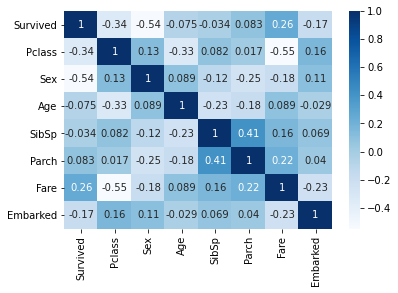

In [105]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [106]:
from scipy.stats import zscore

In [107]:
z=np.abs(zscore(df))

In [108]:
threshold=3

In [109]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [110]:
df_new=df[(z<3).all(axis=1)]

In [111]:
df_new.shape

(818, 8)

In [112]:
Dataloss=((889-818)/889)*100

In [113]:
Dataloss

7.986501687289089

In [114]:
df_new.skew()

Survived    0.457268
Pclass     -0.639191
Sex        -0.671699
Age         0.311150
SibSp       1.975774
Parch       2.118544
Fare        2.342849
Embarked   -1.273629
dtype: float64

Much dataloss.We will use old dataframe

In [115]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [129]:
x=df.drop('Survived',axis=1)

In [130]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [131]:
y=df['Survived']

In [132]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
from sklearn.svm import SVC

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
from sklearn.metrics import classification_report

In [142]:
maxAccu=0
maxRS=0

In [143]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    predm=model.predict(x_test)
    acc=accuracy_score(y_test,predm)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on Random State',maxRS)


Best Accuracy is 0.8314606741573034 on Random State 74


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)

In [145]:
DTC=DecisionTreeClassifier()

In [146]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
pred=DTC.predict(x_test)

In [148]:
acc=classification_report(y_test,pred)

In [149]:
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       166
           1       0.77      0.82      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.84      0.83       267
weighted avg       0.84      0.84      0.84       267



In [150]:
RFC=RandomForestClassifier()

In [151]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
pred=RFC.predict(x_test)

In [153]:
acc=classification_report(y_test,pred)

In [154]:
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.79      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [155]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.69      0.90      0.79       166
           1       0.69      0.35      0.46       101

    accuracy                           0.69       267
   macro avg       0.69      0.63      0.62       267
weighted avg       0.69      0.69      0.66       267



In [156]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       166
           1       0.63      0.65      0.64       101

    accuracy                           0.72       267
   macro avg       0.71      0.71      0.71       267
weighted avg       0.73      0.72      0.72       267



In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
print(cross_val_score(DTC,x,y,cv=5).mean())


0.7728305719545483


In [159]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8110391671427666


In [160]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.6738081635244081


In [162]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6929473751031551


In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
parameter={'criterion':['gini','entropy'],'bootstrap':[True,False],'max_depth':np.arange(2,10),'max_features':['auto','sqrt','log2']}


In [165]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [166]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [167]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2'}

In [168]:
Finalmod=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=8,max_features='log2')

In [169]:
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.6441947565543


In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [173]:
y_pred_prob=RFC.predict_proba(x_test)[:,1]
y_pred_prob

array([0.22      , 0.19      , 0.98      , 0.09      , 0.247     ,
       0.33333333, 0.011     , 0.04      , 0.98      , 0.16      ,
       0.0525    , 0.07      , 0.96      , 0.06      , 0.60966667,
       0.        , 0.07      , 1.        , 0.01      , 0.98      ,
       0.98      , 0.82      , 0.1       , 0.        , 0.54      ,
       0.98      , 0.02      , 0.01      , 0.55      , 0.13      ,
       0.98      , 0.01      , 0.50838095, 1.        , 0.09      ,
       0.11      , 0.        , 0.        , 0.93      , 0.85278571,
       0.77407073, 0.99      , 0.        , 0.7       , 0.92      ,
       0.78      , 0.82      , 0.07      , 0.23      , 0.49      ,
       0.5       , 1.        , 0.07      , 0.05      , 0.02      ,
       0.44      , 0.06      , 0.25      , 0.48133333, 0.3       ,
       0.03      , 0.31666667, 0.04      , 0.04      , 0.        ,
       0.12      , 0.91      , 0.94      , 0.43      , 0.23      ,
       0.69      , 0.33      , 0.66      , 0.07      , 0.15   

In [174]:
y_pred_prob.shape

(267,)

In [175]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

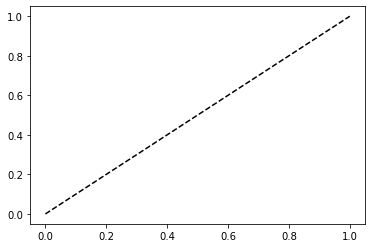

In [176]:
plt.plot([0,1],[0,1],'k--')

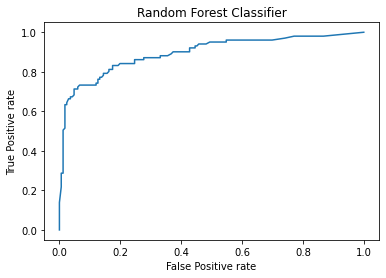

In [177]:
plt.plot(fpr,tpr,label='Random FOrest Classifier')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [178]:
auc_score=roc_auc_score(y_test,DTC.predict(x_test))

auc_score

0.8355898842896337

In [179]:
import joblib

joblib.dump(Finalmod,'Titanic.pkl')


















['Titanic']